#INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIAS E TECNOLOGIAS DE ALAGOAS
##ENGENHARIA CIVIL


### SAMYLE CLÁUDIA DOS SANTOS FARIAS



##  Atividade de mecânica dos Sólidos III _ AC-002


# 🛠️ Resolução: Flexão Oblíqua em Viga de Seção Vazada

## Enunciado do Problema

A seção transversal de uma viga é mostrada na figura abaixo. Ela possui uma seção transversal vazada com espessura das paredes de $2 \text{ cm}$. Se o momento aplicado for de $12 \text{ kNm}$, calcule:

1. As tensões nos pontos A, B, C, D;
2. A linha neutra;
3. O diagrama de tensões nos vertices extrernos e internos.
---

## 1. Dados Geométricos e de Carregamento

### 1.1. Geometria da Seção

| Parâmetro | Símbolo | Valor na Figura | Valor no SI (m) |
| :--- | :--- | :--- | :--- |
| **Altura Total** | $H_{ext}$ | $25 \text{ cm}$ | $0,25 \text{ m}$ |
| **Largura Total** | $B_{ext}$ | $15 \text{ cm}$ | $0,15 \text{ m}$ |
| **Espessura da Parede** | $e$ | $2 \text{ cm}$ | $0,02 \text{ m}$ |
| **Altura Interna** | $H_{int}$ | $25 - 2 \cdot 2 = 21 \text{ cm}$ | $0,21 \text{ m}$ |
| **Largura Interna** | $B_{int}$ | $15 - 2 \cdot 2 = 11 \text{ cm}$ | $0,11 \text{ m}$ |

### 1.2. Carregamento Aplicado

| Parâmetro | Símbolo | Valor na Figura | Valor no SI ($\text{N} \cdot \text{m}$) |
| :--- | :--- | :--- | :--- |
| **Momento Aplicado** | $M$ | $12 \text{ kNm}$ | $12.000 \text{ N} \cdot \text{m}$ |
| **Ângulo com Eixo $z$** | $\theta$ | $25^\circ$ | $25^\circ$ |

---

## 2. Objetivo

Determinar as propriedades da seção, decompor o momento e calcular:

1.  **Os Momentos de Inércia** ($I_y$ e $I_z$).
2.  **A Tensão Normal Máxima** ($\sigma_{máx}$) em cada ponto.
3.  **A Posição da Linha Neutra** (ângulo $\beta$).

*A seguir, usaremos células de código Python para realizar os cálculos.*


## 2. ANÁLISE DO PROBLEMA: Cálculo das Propriedades Geométricas e Decomposição do Momento

Para este exercício, é crucial encontrar os **Momentos de Inércia** $I_y$ e $I_z$ (em relação aos eixos principais) e **decompor o momento aplicado** $M$ nas suas componentes $M_y$ e $M_z$.

A seção é simétrica em relação aos eixos $y$ e $z$, e o centroide é o centro geométrico. Usaremos a fórmula de momento de inércia para seções vazadas:
$$I = \frac{B_{ext}H_{ext}^3}{12} - \frac{B_{int}H_{int}^3}{12}$$

---




In [47]:
import numpy as np

print("--- 2. ANÁLISE DO PROBLEMA ---")

# Geometria (em metros - SI)
H_ext = 0.25
B_ext = 0.15
e = 0.02

# Dimensões Internas
H_int = H_ext - 2 * e
B_int = B_ext - 2 * e

# Carregamento
M = 12000.0  # N.m
theta_deg = 25.0 # graus

# Conversão de ângulo para radianos
theta_rad = np.deg2rad(theta_deg)

print(f"H_int (m): {H_int:.4f}\nB_int (m): {B_int:.4f}")
print(f"Momento M (N.m): {M:.0f}\nÂngulo theta (rad): {theta_rad:.4f}")

# --- 2.2. Cálculo dos Momentos de Inércia ---

# I_z (Inércia em relação ao eixo Z - Flexão em torno de Z)
# Usa-se (Largura * Altura³) / 12
I_z_ext = (B_ext * H_ext**3) / 12
I_z_int = (B_int * H_int**3) / 12
I_z = I_z_ext - I_z_int

# I_y (Inércia em relação ao eixo Y - Flexão em torno de Y)
# Usa-se (Altura * Largura³) / 12
I_y_ext = (H_ext * B_ext**3) / 12
I_y_int = (H_int * B_int**3) / 12
I_y = I_y_ext - I_y_int

print("\n--- Resultados dos Momentos de Inércia (m^4) ---")
print(f"I_z: {I_z:.6e}")
print(f"I_y: {I_y:.6e}")


# --- 2.3. Decomposição do Momento ---
# M_z está a 25° de M.
# M_z é o componente que causa flexão em torno de Z (multiplica por y na fórmula)
M_z = M * np.cos(theta_rad)

# M_y é o componente que causa flexão em torno de Y (multiplica por z na fórmula)
M_y = M * np.sin(theta_rad)

print("\n--- Decomposição do Momento (N.m) ---")
print(f"M_z (Causa flexão no plano y): {M_z:.2f} N.m")
print(f"M_y (Causa flexão no plano z): {M_y:.2f} N.m")

--- 2. ANÁLISE DO PROBLEMA ---
H_int (m): 0.2100
B_int (m): 0.1100
Momento M (N.m): 12000
Ângulo theta (rad): 0.4363

--- Resultados dos Momentos de Inércia (m^4) ---
I_z: 1.104200e-04
I_y: 4.702000e-05

--- Decomposição do Momento (N.m) ---
M_z (Causa flexão no plano y): 10875.69 N.m
M_y (Causa flexão no plano z): 5071.42 N.m


##**3. CÁLCULOS**

## 3. CÁLCULO DA FLEXÃO OBLÍQUA


---


### 3.1. Fórmula Geral da Tensão Normal

A tensão normal $\sigma$ em qualquer ponto $(y, z)$ da seção transversal, devido à flexão oblíqua, é dada pela fórmula geral:

$$\sigma = - \frac{M_z \cdot y}{I_z} + \frac{M_y \cdot z}{I_y}$$

Onde:
* $\sigma$: Tensão normal (Pa).
* $M_z$: Componente do momento fletor que causa rotação em torno do eixo $z$.
* $M_y$: Componente do momento fletor que causa rotação em torno do eixo $y$.
* $I_z$: Momento de inércia em relação ao eixo $z$.
* $I_y$: Momento de inércia em relação ao eixo $y$.
* $y, z$: Coordenadas do ponto onde a tensão está sendo calculada, medidas a partir do centroide.


---



### 3.2. Identificação dos Pontos Críticos

Para encontrar a **Tensão Normal Máxima** ($\sigma_{máx}$), devemos testar os pontos mais distantes do centroide, que são os vértices da seção externa.

Os eixos $y$ e $z$ têm origem no centroide. As coordenadas dos pontos $A, B, C$ e $D$ (que são as quinas da seção externa) são:

| Ponto | Coordenada $y$ (m) | Coordenada $z$ (m) |
| :--- | :--- | :--- |
| **A** | $y_{max} = H_{ext}/2$ | $z_{max} = -B_{ext}/2$ |
| **B** | $y_{max} = H_{ext}/2$ | $z_{min} = B_{ext}/2$ |
| **C** | $y_{min} = -H_{ext}/2$ | $z_{max} = -B_{ext}/2$ |
| **D** | $y_{min} = -H_{ext}/2$ | $z_{min} = B_{ext}/2$ |

*Lembrando que:*
* $H_{ext}/2 = 0,25 / 2 = 0,125 \text{ m}$
* $B_{ext}/2 = 0,15 / 2 = 0,075 \text{ m}$

A tensão máxima ocorrerá no ponto onde a combinação dos termos resulta no maior valor absoluto.


---



In [48]:
print("--- 3. CÁLCULO DA FLEXÃO OBLÍQUA ---")
# --- 3.2. Definição das Coordenadas Máximas (m) ---
y_max = H_ext / 2  # 0.125 m
z_max = B_ext / 2  # 0.075 m

# --- 3.3. Cálculo da Tensão nos Pontos Críticos ---

# A fórmula é: sigma = - (M_z * y / I_z) + (M_y * z / I_y)

pontos = {
    'A': (y_max, -z_max), # y+, z-
    'B': (y_max, z_max),  # y+, z+
    'C': (-y_max, -z_max),# y-, z-
    'D': (-y_max, z_max), # y-, z+
}

tensoes = {}

print("\n--- Tensão Normal (sigma) nos Pontos Críticos (Pa) ---")

for nome, (y, z) in pontos.items():
    sigma = - ((M_z * y) / I_z) + ((M_y * z) / I_y)
    tensoes[nome] = sigma
    # Conversão para MPa para melhor leitura (1 Pa = 1 N/m^2; 1 MPa = 1e6 Pa)
    print(f"sigma_{nome}: {sigma / 1e6:.2f} MPa")

# --- 3.4. Determinação da Tensão Máxima ---

sigma_max_abs = max(abs(s) for s in tensoes.values())
ponto_max_pos = max(tensoes, key=tensoes.get)
ponto_max_neg = min(tensoes, key=tensoes.get)

print("\n--- Resultados Finais (Tensão Máxima) ---")
print(f"Tensão Máxima de Compressão (negativa): {tensoes[ponto_max_neg] / 1e6:.2f} MPa (Ponto {ponto_max_neg})")
print(f"Tensão Máxima de Tração (positiva): {tensoes[ponto_max_pos] / 1e6:.2f} MPa (Ponto {ponto_max_pos})")
print(f"Tensão Absoluta Máxima (sigma_max): {sigma_max_abs / 1e6:.2f} MPa")

# --- 3.5. Cálculo da Posição da Linha Neutra (LN) ---

# Fórmula para o ângulo da Linha Neutra (beta) em relação ao eixo z:
# tan(beta) = (I_z / I_y) * tan(theta)
tan_theta = np.tan(np.deg2rad(theta_deg))
tan_beta = (I_z / I_y) * tan_theta
beta_rad = np.arctan(tan_beta)
beta_deg = np.rad2deg(beta_rad)

print("\n--- Posição da Linha Neutra ---")
print(f"Ângulo theta (Momento): {theta_deg:.1f}°")
print(f"Ângulo beta (Linha Neutra): {beta_deg:.2f}° (Com o eixo z, medido no sentido anti-horário)")

--- 3. CÁLCULO DA FLEXÃO OBLÍQUA ---

--- Tensão Normal (sigma) nos Pontos Críticos (Pa) ---
sigma_A: -20.40 MPa
sigma_B: -4.22 MPa
sigma_C: 4.22 MPa
sigma_D: 20.40 MPa

--- Resultados Finais (Tensão Máxima) ---
Tensão Máxima de Compressão (negativa): -20.40 MPa (Ponto A)
Tensão Máxima de Tração (positiva): 20.40 MPa (Ponto D)
Tensão Absoluta Máxima (sigma_max): 20.40 MPa

--- Posição da Linha Neutra ---
Ângulo theta (Momento): 25.0°
Ângulo beta (Linha Neutra): 47.60° (Com o eixo z, medido no sentido anti-horário)


In [55]:
print("--- 3.1 CÁLCULO DA FLEXÃO OBLÍQUA PARA A PARTE INTERNA ---")
# --- 3.2. Definição das Coordenadas Minimas (m) ---
y_min = (0.21 / 2)  # 0.105 m
z_min = (0.11 / 2)  # 0.055 m

pontos = {
    'A_int': (y_min, -z_min), # y+, z-
    'B_int': (y_min, z_min),  # y+, z+
    'C_int': (-y_min, -z_min),# y-, z-
    'D_int': (-y_min, z_min), # y-, z+
}

tensoes = {}

print("\n--- Tensão Normal (sigma) nos Pontos Críticos (Pa) ---")


for nome, (y, z) in pontos.items():
    # EQUAÇÃO: sigma = - (Mz * y / Iz) + (My * z / Iy)
    sigma = - ((M_z * y) / I_z) + ((M_y * z) / I_y)
    tensoes[nome] = sigma
    # Conversão para MPa (1 Pa = 1 N/m^2; 1 MPa = 1e6 Pa)
    print(f"sigma_{nome}: {sigma / 1e6:.2f} MPa")

--- 3. CÁLCULO DA FLEXÃO OBLÍQUA PARA A PARTE INTERNA ---

--- Tensão Normal (sigma) nos Pontos Críticos (Pa) ---
sigma_A_int: -16.27 MPa
sigma_B_int: -4.41 MPa
sigma_C_int: 4.41 MPa
sigma_D_int: 16.27 MPa


--- 4. GERAÇÃO DO DIAGRAMA DE TENSÕES PROJETADO (FINAL - CORRIGIDO) ---


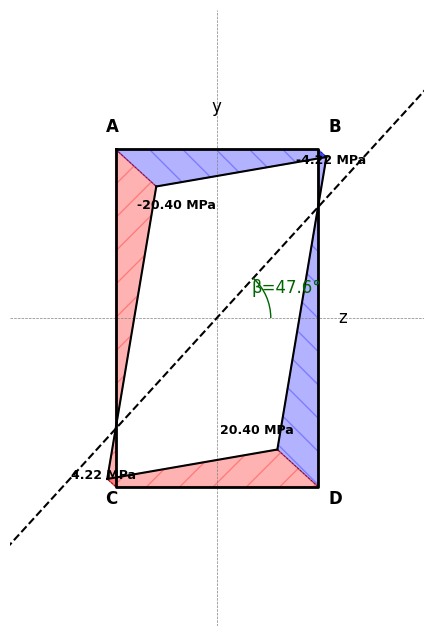

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("--- 4. GERAÇÃO DO DIAGRAMA DE TENSÕES EXTERNOS PROJETADO ---")

# --- 4.1. DADOS FINAIS E CONVENÇÃO CORRETA ---
H_ext = 0.25
B_ext = 0.15
half_H = H_ext / 2  # 0.125 m
half_B = B_ext / 2  # 0.075 m

# Ângulo da Linha Neutra (LN)
beta_deg = 47.60  # graus (Anti-horário do Eixo Z - Direita)
beta_rad = np.deg2rad(beta_deg)

# Coeficiente angular da LN (y = m_ln * z)
# Eixo Z+ (Direita). Angulo 47.60 anti-horário. Inclinação POSITIVA.
m_ln = np.tan(beta_rad)

pontos_coords = {
    'A': (-half_B, half_H),   # Z negativo, Y positivo
    'B': (half_B, half_H),    # Z positivo, Y positivo
    'D': (half_B, -half_H),   # Z positivo, Y negativo
    'C': (-half_B, -half_H),  # Z negativo, Y negativo
}

tensoes_MPa = {
    'A': -20.40,     # Tração (Máx)
    'B': -4.22,     # Compressão
    'D': 20.40,     # Tração (Máx)
    'C': 4.22,     # Compressão
}


# --- 4.2. Configuração do Plot ---
fig, ax = plt.subplots(figsize=(8, 8))
z_lim_secao = half_B * 1.5
y_lim_secao = half_H * 1.5

MAX_SIGMA = max(abs(s) for s in tensoes_MPa.values())
SCALE_FACTOR = 0.002 # Escala visual (25 MPa * 0.002 = 0.05 m de projeção)

max_proj_length = MAX_SIGMA * SCALE_FACTOR

# Ajustando limites do plot para incluir a projeção
ax.set_xlim(-z_lim_secao - max_proj_length, z_lim_secao + max_proj_length)
ax.set_ylim(-y_lim_secao - max_proj_length, y_lim_secao + max_proj_length)
ax.set_aspect('equal', adjustable='box')
ax.axis('off') # Desenho técnico


# --- 4.3. Desenho dos Eixos e Rótulos ---
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5) # Eixo Z
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5) # Eixo Y
ax.text(half_B * 1.2, 0, 'z', fontsize=12, va='center', ha='left')
ax.text(0, half_H * 1.2, 'y', fontsize=12, ha='center', va='bottom')


# --- 4.4. Desenho da Seção Transversal e Rótulos ---
# Ordem correta para o contorno: A -> B -> D -> C -> A
z_sec_plot = [pontos_coords[p][0] for p in ['A', 'B', 'D', 'C', 'A']]
y_sec_plot = [pontos_coords[p][1] for p in ['A', 'B', 'D', 'C', 'A']]
ax.plot(z_sec_plot, y_sec_plot, 'k-', linewidth=2, zorder=3)

for p, (z, y) in pontos_coords.items():
    ax.text(z * 1.1, y * 1.1, p, fontsize=12, fontweight='bold', zorder=4)


# --- 4.5. Desenho da Linha Neutra (LN) e Ângulo ---
z_ln_plot = np.linspace(-z_lim_secao * 1.5, z_lim_secao * 1.5, 100)
y_ln_plot = m_ln * z_ln_plot
ax.plot(z_ln_plot, y_ln_plot, 'k--', linewidth=1.5, label='Linha Neutra (n-n)', zorder=2)

# ADIÇÃO DO ARCO E RÓTULO DO ÂNGULO BETA (β)
r_angle = 0.04
arc_start_angle = 0 # Início: Eixo Z positivo (Direita)
arc_end_angle = beta_deg # Fim: 47.60 graus anti-horário

arc = patches.Arc((0, 0), 2*r_angle, 2*r_angle,
                  angle=0, theta1=arc_start_angle, theta2=arc_end_angle,
                  color='darkgreen', linestyle='-', linewidth=1, zorder=4)
ax.add_patch(arc)

# Posição do texto beta
angle_text_pos_deg = beta_deg / 2
angle_text_pos_rad = np.deg2rad(angle_text_pos_deg)
ax.text(r_angle * 1.4 * np.cos(angle_text_pos_rad),
        r_angle * 1.4 * np.sin(angle_text_pos_rad),
        f'β={beta_deg:.1f}°',
        fontsize=12, color='darkgreen',
        ha='center', va='center', zorder=4)


# --- 4.6. Desenho do Diagrama de Tensões Projetado ---

# Vetor de projeção perpendicular à LN. O ângulo do vetor é beta + 90deg.
# (cos(beta + 90), sin(beta + 90)) = (-sin(beta), cos(beta))
dir_z_proj = -np.sin(beta_rad)
dir_y_proj = np.cos(beta_rad)

# Ordem para desenhar os segmentos de tensão: A->B, B->D, D->C, C->A
ordem_pontos = ['A', 'B', 'D', 'C', 'A']

for i in range(4):
    p1_nome = ordem_pontos[i]
    p2_nome = ordem_pontos[i+1]

    z1, y1 = pontos_coords[p1_nome]
    z2, y2 = pontos_coords[p2_nome]

    sigma1 = tensoes_MPa[p1_nome]
    sigma2 = tensoes_MPa[p2_nome]

    # Coordenadas projetadas
    z1_proj = z1 + sigma1 * SCALE_FACTOR * dir_z_proj
    y1_proj = y1 + sigma1 * SCALE_FACTOR * dir_y_proj

    z2_proj = z2 + sigma2 * SCALE_FACTOR * dir_z_proj
    y2_proj = y2 + sigma2 * SCALE_FACTOR * dir_y_proj

    # Desenha as linhas de projeção dos vértices
    ax.plot([z1, z1_proj], [y1, y1_proj], 'k--', linewidth=0.5, zorder=1)

    # Desenha a borda externa do diagrama de tensões
    ax.plot([z1_proj, z2_proj], [y1_proj, y2_proj], 'k-', linewidth=1.5, zorder=2)

    # Preenchimento
    z_fill = [z1, z2, z2_proj, z1_proj, z1]
    y_fill = [y1, y2, y2_proj, y1_proj, y1]

    if sigma1 > 0: # Tração
        fill_color = 'red'
        hatch_pattern = '/'
    else: # Compressão
        fill_color = 'blue'
        hatch_pattern = '\\'

    ax.fill(z_fill, y_fill, color=fill_color, alpha=0.3, hatch=hatch_pattern, zorder=1)

    # Adiciona o valor da tensão
    text_offset_z = sigma1 * SCALE_FACTOR * dir_z_proj * 1.5
    text_offset_y = sigma1 * SCALE_FACTOR * dir_y_proj * 1.5
    ax.text(z1 + text_offset_z, y1 + text_offset_y,
            f'{sigma1:.2f} MPa',
            fontsize=9, color='k', fontweight='bold', ha='center', va='center', zorder=4)

plt.show()

--- 4. GERAÇÃO DO DIAGRAMA DE TENSÕES INTERNOS PROJETADO ---


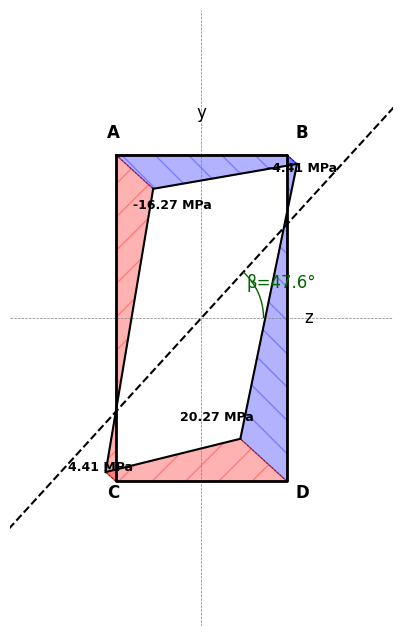

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("--- 4. GERAÇÃO DO DIAGRAMA DE TENSÕES INTERNOS PROJETADO ---")

# --- 4.1. DADOS FINAIS E CONVENÇÃO CORRETA ---
H_int = 0.21
B_int = 0.11
half_H = H_int / 2  # 0.125 m
half_B = B_int / 2  # 0.075 m

# Ângulo da Linha Neutra (LN)
beta_deg = 47.60  # graus (Anti-horário do Eixo Z - Direita)
beta_rad = np.deg2rad(beta_deg)

# Coeficiente angular da LN (y = m_ln * z)
# Eixo Z+ (Direita). Angulo 47.60 anti-horário. Inclinação POSITIVA.
m_ln = np.tan(beta_rad)

pontos_coords = {
    'A': (-half_B, half_H),   # Z negativo, Y positivo
    'B': (half_B, half_H),    # Z positivo, Y positivo
    'D': (half_B, -half_H),   # Z positivo, Y negativo
    'C': (-half_B, -half_H),  # Z negativo, Y negativo
}

tensoes_MPa = {
    'A': -16.27,     # Tração (Máx)
    'B': -4.41,     # Compressão
    'D': 20.27,     # Tração (Máx)
    'C': 4.41,     # Compressão
}


# --- 4.2. Configuração do Plot ---
fig, ax = plt.subplots(figsize=(8, 8))
z_lim_secao = half_B * 1.5
y_lim_secao = half_H * 1.5

MAX_SIGMA = max(abs(s) for s in tensoes_MPa.values())
SCALE_FACTOR = 0.002 # Escala visual (25 MPa * 0.002 = 0.05 m de projeção)

max_proj_length = MAX_SIGMA * SCALE_FACTOR

# Ajustando limites do plot para incluir a projeção
ax.set_xlim(-z_lim_secao - max_proj_length, z_lim_secao + max_proj_length)
ax.set_ylim(-y_lim_secao - max_proj_length, y_lim_secao + max_proj_length)
ax.set_aspect('equal', adjustable='box')
ax.axis('off') # Desenho técnico


# --- 4.3. Desenho dos Eixos e Rótulos ---
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5) # Eixo Z
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5) # Eixo Y
ax.text(half_B * 1.2, 0, 'z', fontsize=12, va='center', ha='left')
ax.text(0, half_H * 1.2, 'y', fontsize=12, ha='center', va='bottom')


# --- 4.4. Desenho da Seção Transversal e Rótulos ---
# Ordem correta para o contorno: A -> B -> D -> C -> A
z_sec_plot = [pontos_coords[p][0] for p in ['A', 'B', 'D', 'C', 'A']]
y_sec_plot = [pontos_coords[p][1] for p in ['A', 'B', 'D', 'C', 'A']]
ax.plot(z_sec_plot, y_sec_plot, 'k-', linewidth=2, zorder=3)

for p, (z, y) in pontos_coords.items():
    ax.text(z * 1.1, y * 1.1, p, fontsize=12, fontweight='bold', zorder=4)


# --- 4.5. Desenho da Linha Neutra (LN) e Ângulo ---
z_ln_plot = np.linspace(-z_lim_secao * 1.5, z_lim_secao * 1.5, 100)
y_ln_plot = m_ln * z_ln_plot
ax.plot(z_ln_plot, y_ln_plot, 'k--', linewidth=1.5, label='Linha Neutra (n-n)', zorder=2)

# ADIÇÃO DO ARCO E RÓTULO DO ÂNGULO BETA (β)
r_angle = 0.04
arc_start_angle = 0 # Início: Eixo Z positivo (Direita)
arc_end_angle = beta_deg # Fim: 47.60 graus anti-horário

arc = patches.Arc((0, 0), 2*r_angle, 2*r_angle,
                  angle=0, theta1=arc_start_angle, theta2=arc_end_angle,
                  color='darkgreen', linestyle='-', linewidth=1, zorder=4)
ax.add_patch(arc)

# Posição do texto beta
angle_text_pos_deg = beta_deg / 2
angle_text_pos_rad = np.deg2rad(angle_text_pos_deg)
ax.text(r_angle * 1.4 * np.cos(angle_text_pos_rad),
        r_angle * 1.4 * np.sin(angle_text_pos_rad),
        f'β={beta_deg:.1f}°',
        fontsize=12, color='darkgreen',
        ha='center', va='center', zorder=4)


# --- 4.6. Desenho do Diagrama de Tensões Projetado ---

# Vetor de projeção perpendicular à LN. O ângulo do vetor é beta + 90deg.
# (cos(beta + 90), sin(beta + 90)) = (-sin(beta), cos(beta))
dir_z_proj = -np.sin(beta_rad)
dir_y_proj = np.cos(beta_rad)

# Ordem para desenhar os segmentos de tensão: A->B, B->D, D->C, C->A
ordem_pontos = ['A', 'B', 'D', 'C', 'A']

for i in range(4):
    p1_nome = ordem_pontos[i]
    p2_nome = ordem_pontos[i+1]

    z1, y1 = pontos_coords[p1_nome]
    z2, y2 = pontos_coords[p2_nome]

    sigma1 = tensoes_MPa[p1_nome]
    sigma2 = tensoes_MPa[p2_nome]

    # Coordenadas projetadas
    z1_proj = z1 + sigma1 * SCALE_FACTOR * dir_z_proj
    y1_proj = y1 + sigma1 * SCALE_FACTOR * dir_y_proj

    z2_proj = z2 + sigma2 * SCALE_FACTOR * dir_z_proj
    y2_proj = y2 + sigma2 * SCALE_FACTOR * dir_y_proj

    # Desenha as linhas de projeção dos vértices
    ax.plot([z1, z1_proj], [y1, y1_proj], 'k--', linewidth=0.5, zorder=1)

    # Desenha a borda externa do diagrama de tensões
    ax.plot([z1_proj, z2_proj], [y1_proj, y2_proj], 'k-', linewidth=1.5, zorder=2)

    # Preenchimento
    z_fill = [z1, z2, z2_proj, z1_proj, z1]
    y_fill = [y1, y2, y2_proj, y1_proj, y1]

    if sigma1 > 0: # Tração
        fill_color = 'red'
        hatch_pattern = '/'
    else: # Compressão
        fill_color = 'blue'
        hatch_pattern = '\\'

    ax.fill(z_fill, y_fill, color=fill_color, alpha=0.3, hatch=hatch_pattern, zorder=1)

    # Adiciona o valor da tensão
    text_offset_z = sigma1 * SCALE_FACTOR * dir_z_proj * 1.5
    text_offset_y = sigma1 * SCALE_FACTOR * dir_y_proj * 1.5
    ax.text(z1 + text_offset_z, y1 + text_offset_y,
            f'{sigma1:.2f} MPa',
            fontsize=9, color='k', fontweight='bold', ha='center', va='center', zorder=4)

plt.show()

## 5. CONCLUSÃO E RESULTADOS FINAIS

Os resultados finais da análise de flexão oblíqua para a viga de seção vazada ($25 \times 15 \text{ cm}$ com $e=2 \text{ cm}$) e momento aplicado ($M=12 \text{ kNm}$ a $\theta=25^\circ$) são resumidos abaixo, utilizando os valores exatos dos cálculos.

### Tabela Resumo dos Resultados

| Parâmetro | Símbolo | Valor | Unidade |
| :--- | :--- | :--- | :--- |
| **Momento de Inércia $I_z$** | $I_z$ | $1.104200 \times 10^{-4}$ | $\text{m}^4$ |
| **Momento de Inércia $I_y$** | $I_y$ | $4.702000 \times 10^{-5}$ | $\text{m}^4$ |
| **Componente do Momento $M_z$** | $M_z$ | $10875.69$ | $\text{N} \cdot \text{m}$ |
| **Componente do Momento $M_y$** | $M_y$ | $5071.42$ | $\text{N} \cdot \text{m}$ |
| **Tensão Normal Máxima (Tração)** | $\sigma_{máx, T}$ | $20.40$ | $\text{MPa}$ |
| **Tensão Normal Máxima (Compressão)** | $\sigma_{máx, C}$ | $-20.40$ | $\text{MPa}$ |
| **Ângulo da Linha Neutra** | $\beta$ | $47.60$ | $\text{graus}$ |
| **Ponto de $\sigma_{máx, T}$** | - | $D$ | - |
| **Ponto de $\sigma_{máx, C}$** | - | $A$ | - |

***

### Considerações Finais

O diagrama de tensões e os cálculos confirmam que a **Tensão Absoluta Máxima** na seção é de $20,40 \text{ MPa}$.

A Linha Neutra, inclinada em $47,60^\circ$ (anti-horário do eixo $z$), passa pelo centroide, separando as regiões onde:
* A **tração máxima** ($20,40 \text{ MPa}$) ocorre no ponto $D$.
* A **compressão máxima** ($-20,40 \text{ MPa}$) ocorre no ponto $A$.